In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Train your first neural network: basic classification

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/basic_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details, this is a fast-paced overview of a complete TensorFlow program with the details explained as we go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

## Import the Fashion MNIST dataset

本指南使用 [Fashion MNIST]（https://github.com/zalandoresearch/fashion-mnist) 數據集，其中包含10個類別的70,000個灰階圖像。每張圖像顯示了低解析度（28 x 28像素）的單件服裝，如下所示：

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


Fashion MNIST 旨在替代經典的 [MNIST]（http://yann.lecun.com/exdb/mnist/) 數據集 - 通常用來作為電腦視覺中機器學習程式的“Hello，World” 。 MNIST數據集包含手寫數字（0,1,2等）的圖像，其格式與我們在此處使用的服裝相同。

為了有所變化，本指南使用Fashion MNIST，因為它比普通的MNIST更具挑戰性。兩個數據集都相對較小，可用來驗證算法是否按預期運作。它們是作為代碼測試和除錯的良好起點。

我們將利用60,000個圖像來訓練網絡，以及10,000個圖像來評估網絡在學習後對圖像進行分類的準確程度。可以直接藉由TensorFlow來使用 Fashion MNIST，只需導入並加載數據：

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

讀取 dataset 後回傳 4 個 NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

圖像是28x28 NumPy array，像素值介於0到255之間。*labels*是一個integer array，範圍從0到9.這些對應於圖像所代表的衣服的*class*：
<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

每個圖像都對應到一個標籤。由於*class names*不包含在數據集中，因此將它們儲存在此處以便在繪圖時使用：

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

讓我們在訓練模型之前探索數據集的格式。以下顯示訓練集有60,000個圖像，每個圖像以28 x 28像素表示：

In [6]:
train_images.shape

(60000, 28, 28)

同樣，訓練集有60,000個標籤：

In [7]:
len(train_labels)

60000

每個標籤都是介於 0 到 9 的整數:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

測試集中有10,000個圖像。同樣，每個圖像表示為28 x 28像素：

In [9]:
test_images.shape

(10000, 28, 28)

測試集包含10,000個圖像標籤：

In [10]:
len(test_labels)

10000

## Preprocess the data

在訓練網絡之前，必須對數據進行預處理。如果觀察訓練集中的第一個圖像，將看到像素值落在0到255的範圍內：

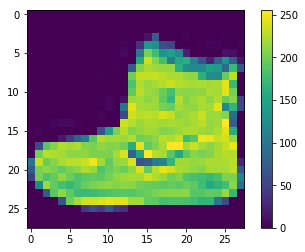

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

在將資料餵進到神經網絡模型之前，我們將這些值縮放到0到1的範圍。為此，將圖像組件的數據類型從整數轉換為float，並除以255.這是預處理圖像的函數：

以同樣的方式預處理*訓練集*和*測試集*是非常重要的：

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

顯示*訓練集*中的前25個圖像，並在每個圖像下方顯示分類名稱。並驗證數據格式是否正確，我們是否已準備好構建和培訓網絡。

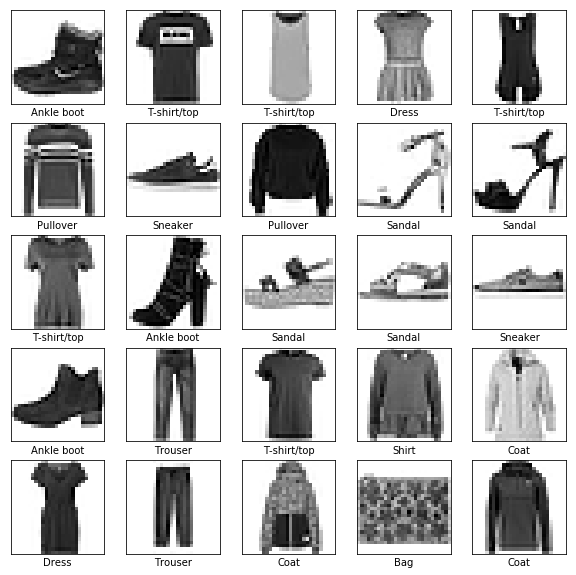

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

構建神經網絡需要配置模型的層(layer)，然後編譯模型。

### Setup the layers

神經網絡的基本構建塊是*層*。圖層從提供給它們的數據中提取表示(representations)。並希望這些表示對於手頭上的問題更有意義。

大多數深度學習包括將簡單層鏈接在一起。大多數層，如`tf.keras.layers.Dense`，都具有在訓練期間學習的參數。

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

該網絡中的第一層`tf.keras.layers.Flatten`將圖像的格式從2d陣列（28x28像素）轉換為28 * 28 = 784像素的1d陣列。可以將此圖層視為圖像中未堆疊的像素行並將其排列。該層沒有要學習的參數;它只重新格式化數據。

在像素被展平之後，網絡由兩個`tf.keras.layers.Dense`層組成。這些是密集連接或完全連接的神經層。第一個“密集”層有128個節點（或神經元）。第二個（也是最後一個）層是一個10節點*softmax*層 - 這將返回一個10個機率分數的array，其總和為1。每個節點包含一個分數，表示當前圖像屬於10個類別之一的機率。

### Compile the model

在模型準備好進行訓練之前，它需要更多設置。這些是在模型的*compile*步驟中添加的：

* *Loss function* — 可以衡量模型在訓練過程中的準確程度。我們希望最小化此function，以便在正確的方向上“引導”模型。
* *Optimizer* — 模型如何根據它看到的數據及其損失函數來進行更新
* *Metrics* — 用於監控訓練和測試步驟。以下示例使用*accuracy*，即正確分類的圖像的比例。

In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

訓練神經網絡模型需要以下步驟：

1. 將訓練數據提供給模型 - 在本例中，`train_images`和`train_labels`array。
2. 該模型學會圖像和標籤間的關聯。
3. 我們要求模型對測試集進行預測 - 在本例中為`test_images` array。我們驗證預測是否匹配`test_labels`數組中的標籤。

要開始訓練，於是呼叫`model.fit`方法 - 模型 “fit” 訓練數據：

In [17]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.5000 - acc: 0.8237
Epoch 2/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.3769 - acc: 0.8652
Epoch 3/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3383 - acc: 0.8758
Epoch 4/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3156 - acc: 0.8846
Epoch 5/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.2965 - acc: 0.8900


隨著模型訓練，顯示損失和準確度指標。該模型在訓練數據上達到約0.88（或88％）的準確度。

## Evaluate accuracy

接下來，比較模型在測試集上的執行情況：

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 18us/step
Test accuracy: 0.8787


事實證明，測試數據集的準確性略低於訓練數據集的準確性。訓練精度和測試精度之間的差距是*Overfitting*的一個例子。Overfitting是指機器學習模型在新數據上的表現比在訓練數據上表現更差。

## Make predictions

通過訓練模型，我們可以使用它來預測某些圖像。

In [19]:
predictions = model.predict(test_images)

這裡，模型已經預測了測試集中每個圖像的標籤。我們來看看第一個預測：

In [20]:
predictions[0]

array([3.7887887e-06, 2.1581617e-07, 5.3343445e-07, 6.4647026e-09,
       7.5512339e-08, 6.0206456e-03, 1.8571077e-06, 1.3835670e-02,
       3.0598170e-05, 9.8010659e-01], dtype=float32)

預測是10個數字的數組。這些描述了模型的“信心”，即圖像對應於10種不同服裝中的每一種。我們可以看到哪個標籤具有最高的信度值：

In [21]:
np.argmax(predictions[0])

9

因此模型最有信心的是這個圖像是踝靴，或者是“class_names[9]”。我們可以檢查測試標籤，看看這是否正確：

In [22]:
test_labels[0]

9

我們可以用圖表來查看全部的10個集合

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

讓我們看看第 0 個圖像，預測和預測 array。

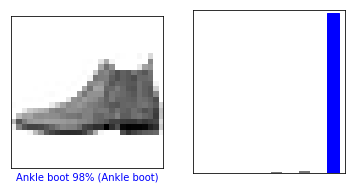

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

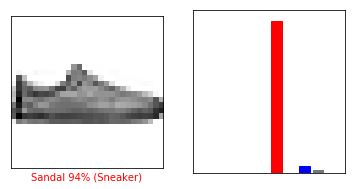

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

讓我們用他們的預測繪製幾張圖。正確的預測標籤是藍色的，不正確的預測標籤是紅色的。該數字給出了預測標籤的百分比（滿分100）。請注意，即使非常自信，也可能出錯。

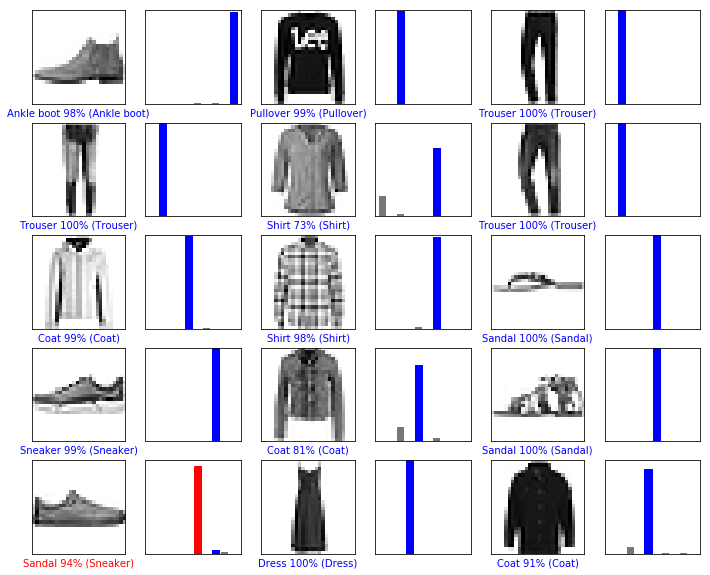

In [26]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

最後，使用訓練的模型對單張圖像進行預測。

In [27]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


`tf.keras`模型經過優化，可以立即對*batch*或集合進行預測。因此，即使我們使用單個圖像，我們也需要將其添加到 list 中：

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


現在預測圖像：

In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.7887846e-06 2.1581617e-07 5.3343342e-07 6.4646901e-09 7.5512204e-08
  6.0206489e-03 1.8571041e-06 1.3835657e-02 3.0598138e-05 9.8010659e-01]]


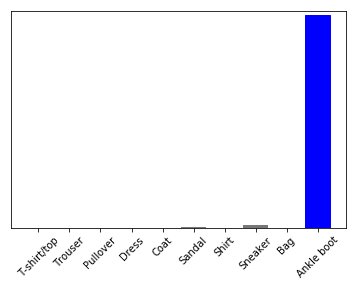

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict`回傳a list of lists，每個list對應一批數據。抓取批次中我們對圖像的預測：

In [31]:
np.argmax(predictions_single[0])

9

和之前一樣，模型預測標籤為9。